# Creating A Smash Hit Song Through Data

In [146]:
import pandas as pd
import matplotlib.pyplot

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### We want to start by trying to find a good typical range for bpm. Let's plot a histogram to see the distribution, and for some descriptive statistics let's calculate the mean, median, and the 25th/75th percentile.

<Axes: title={'center': 'Distribution of BPM in Spotify 2023 Songs'}, xlabel='BPM (Beats Per Minute)', ylabel='Number of Songs'>

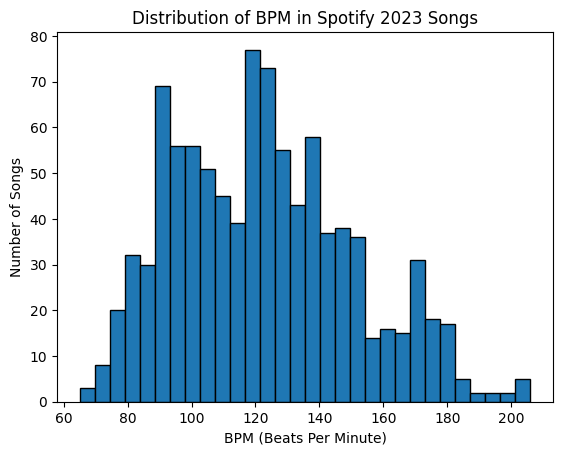

In [19]:
df['bpm'].plot(kind='hist', edgecolor='black', bins=30, ylabel='Number of Songs', xlabel='BPM (Beats Per Minute)', title='Distribution of BPM in Spotify 2023 Songs')

In [15]:
df['bpm'].describe()

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

### We can see from this that most of the songs are clustered in the middle, between 100 and 140 BPM. Our numbers also confirm this. The 25th percentile is 100 and the 75th is 140. So for BPM, a perfect range for our smash hit to be in should be between 100-140 BPM.

### Next, let's move on to the next 2 features, Key and Mode. We'll create 2 bar charts to illustrate our data.

mode
Major    550
Minor    403
Name: count, dtype: int64

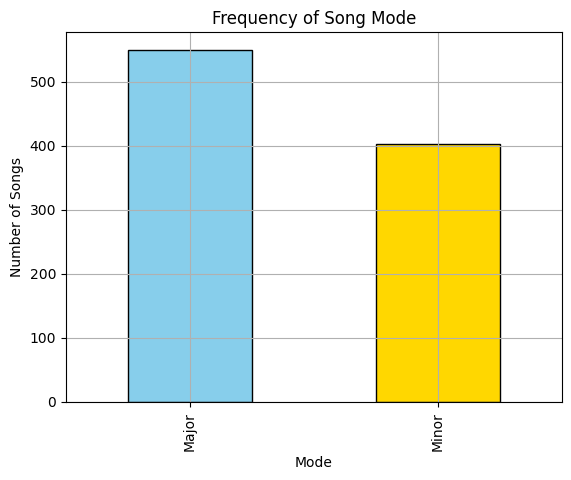

In [68]:
df['mode'].value_counts().plot(kind='bar', xlabel='Mode', ylabel='Number of Songs', title='Frequency of Song Mode', color=['skyblue', 'gold'], edgecolor='black', grid=True)
df['mode'].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

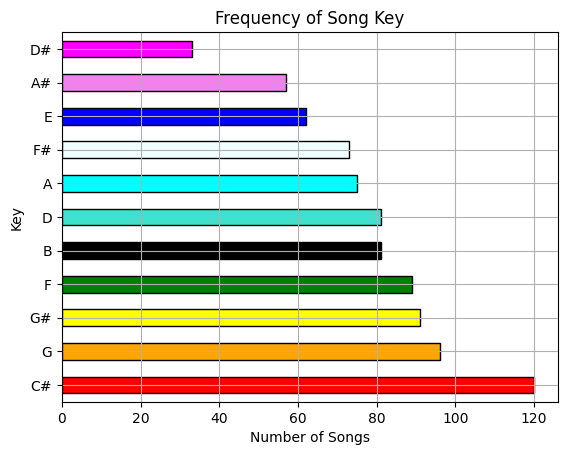

In [66]:
df['key'].value_counts().plot(kind='barh',
                              xlabel='Number of Songs', 
                              ylabel='Key', 
                              title='Frequency of Song Key', 
                              color=[
                                    "red",
                                    "orange",
                                    "yellow",
                                    "green",
                                    "black",
                                    "turquoise",
                                    "cyan",
                                    "azure",
                                    "blue",
                                    "violet",
                                    "magenta"
                                ], edgecolor='black', grid=True)
df['key'].value_counts()

### C# is clearly the most common key as shown in our key graph with 120 songs. For Mode, the clear winner is Major with 550 songs compared to 403 for Minor. So knowing that, our smash hit song should consist of a C# key and the mode should be Major.

### Finally we got Danceability, Energy, Speechiness, and Acousticness. We will plot 4 histograms to display our data.

count    953.00000
mean      66.96957
std       14.63061
min       23.00000
25%       57.00000
50%       69.00000
75%       78.00000
max       96.00000
Name: danceability_%, dtype: float64

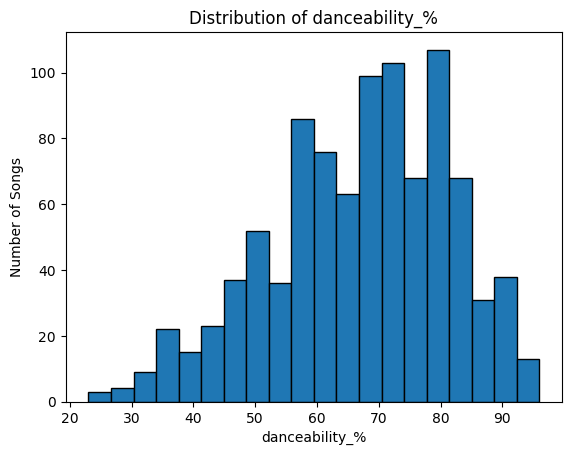

In [92]:
df['danceability_%'].plot(kind='hist', edgecolor='black', bins=20, ylabel='Number of Songs', xlabel='danceability_%', title='Distribution of danceability_%')
df['danceability_%'].describe()

### For danceability, the distribution looks closely centered. The IQR of songs fall between 57% and 78%. So for a smash hit song we need it to be somewhere between 57% to 78%.

count    953.000000
mean      64.279119
std       16.550526
min        9.000000
25%       53.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: energy_%, dtype: float64

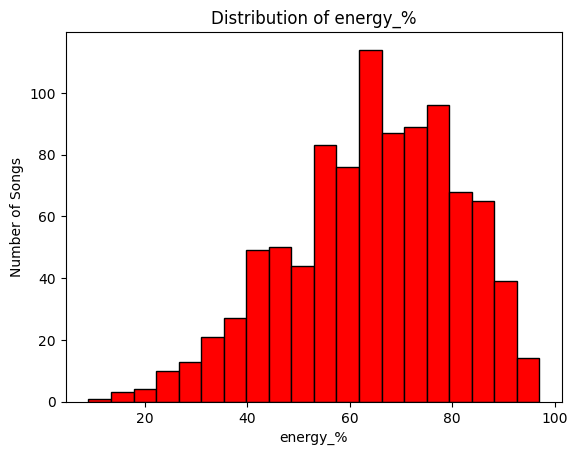

In [93]:
df['energy_%'].plot(kind='hist', color='red', edgecolor='black', bins=20, ylabel='Number of Songs', xlabel='energy_%', title='Distribution of energy_%')
df['energy_%'].describe()

### Energy looks fairly symmetric as well. The IQR is 53% to 77%. This places our smash hit song between 53% to 77%.

count    953.000000
mean      10.131165
std        9.912888
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       64.000000
Name: speechiness_%, dtype: float64

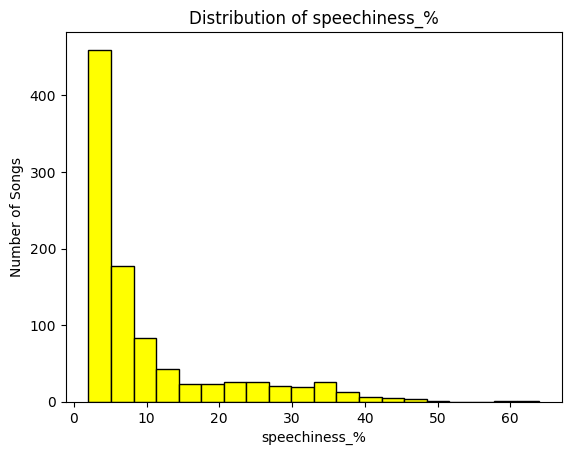

In [94]:
df['speechiness_%'].plot(kind='hist', color='yellow', edgecolor='black', bins=20, ylabel='Number of Songs', xlabel='speechiness_%', title='Distribution of speechiness_%')
df['speechiness_%'].describe()

### This graph stands out because it is right-skewed. Most of our songs have low speechiness. We want our IQR which will give us 4% to 11% speechiness. Our song needs 4% to 11% speechiness.

count    953.000000
mean      27.057712
std       25.996077
min        0.000000
25%        6.000000
50%       18.000000
75%       43.000000
max       97.000000
Name: acousticness_%, dtype: float64

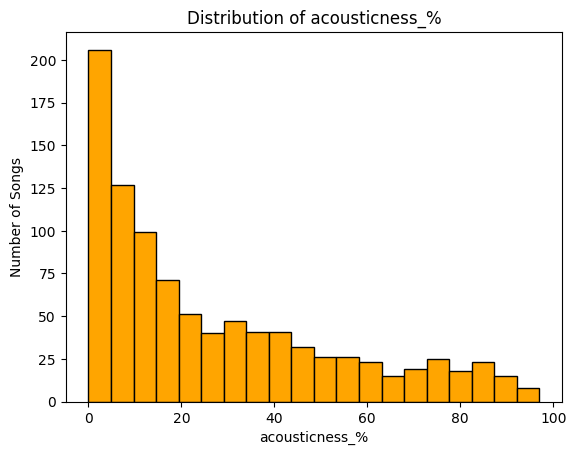

In [95]:
df['acousticness_%'].plot(kind='hist', color='orange', edgecolor='black', bins=20, ylabel='Number of Songs', xlabel='acousticness_%', title='Distribution of acousticness_%')
df['acousticness_%'].describe()

### This one is also right-skewed. Most songs are not very acoustic. IQR is 6 to 43 percent so are songs needs to be between those ranges.

### Based on all the data we collected. Our smash hit song must look something like this.
1. BPM: 100-140
2. Key: C#
3. Mode: Major
4. Danceabilty: 57-78%
5. Energy: 53-77%
6. Speechiness: 4-11%
7. Acousticness: 6-43%

### Now let's filter through our database to see if we can find any songs that land in these ranges.

In [102]:
filtered_df = df.loc[
    (df['bpm'] >= 100) & (df['bpm'] <= 140) & 
    (df['mode'] == 'Major') & 
    (df['key'] == 'C#') & 
    (df['danceability_%'] >= 57) & (df['danceability_%'] <= 78) &
    (df['energy_%'] >= 53) & (df['energy_%'] <= 77) &
    (df['speechiness_%'] >= 4) & (df['speechiness_%'] <= 11) &
    (df['acousticness_%'] >= 6) & (df['acousticness_%'] <= 43)]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
518,Need To Know,Doja Cat,1,2021,6,11,6672,0,1042568408,125,...,130,C#,Major,66,19,61,30,0,9,7
660,Ginseng Strip 2002,Yung Lean,1,2013,8,16,4310,0,240769997,13,...,115,C#,Major,60,37,71,8,0,48,4


### With these songs including the values for a smash hit song. Were they any popular? Let's find the median and mean for our streams from the entire database.

In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'] = df['streams'].astype('Int64')
df['streams'].describe()

### We find our mean is 514,137,425 and our median is 290,530,915. 'Need To Know' is a massive smash hit. Its 1 billion+ streams are double the dataset's average and almost four times the median.
### 'Ginseng Strip 2002' has 240 million streams. While that's slightly below the median for this specific dataset, it's still an incredibly popular and successful song by any standard.

### Let's compare the song 'vampire' by Olivia Rodrigo to our 'perfect' songs.

In [156]:
filtered_df = df.loc[(df['track_name'] == 'vampire') & (df['artist(s)_name'] == 'Olivia Rodrigo')]
filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6


### As we can see, the song is missing our 'perfect' key and danceability requirements. The total streams is 140,003,974 which is far lower than our songs that fit within the 'perfect' requirements. With this little insight there may be some truth to the ranges in our 'perfect' songs playing a huge role in their success.